In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Loading the IMDB dataset
df=pd.read_csv('/content/drive/MyDrive/imdb_dataset/imdb_dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
# Getting info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
# viewing the first 10 elements of the dataset
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
# Count the number of positive and negative reviews
sentiment_counts = df['sentiment'].value_counts()

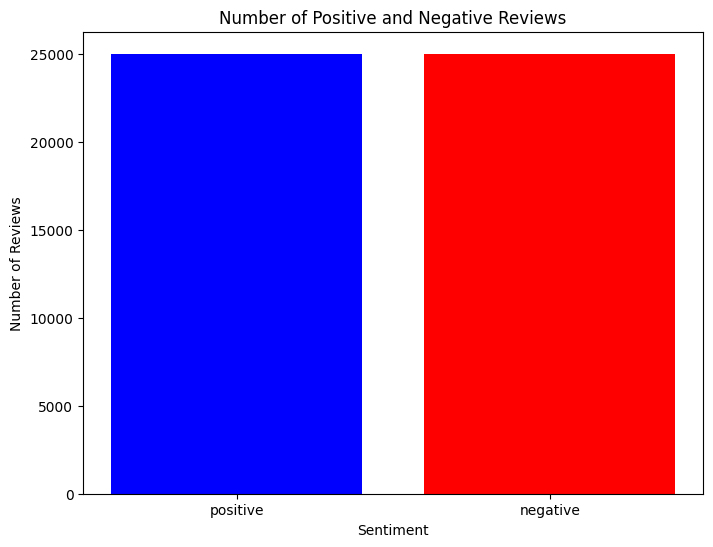

In [ ]:
# Plot the positive and negative reviews count
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Number of Positive and Negative Reviews')
plt.show()

# Text Processing

In [ ]:
import string

In [ ]:
stop_words = set(stopwords.words('english'))

cleaning the text

In [ ]:
def preprocess_text(text):
  # remove punctuation
  text=text.translate(str.maketrans('','',string.punctuation))
  # convert to lower-case
  text=text.lower()
  # tokenize
  words = word_tokenize(text)
  # remove stopwords
  words=[word for word in words if word not in stop_words]
  return ' '.join(words)

In [ ]:
df['review']=df['review'].apply(preprocess_text)

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer=TfidfVectorizer(max_df=0.95, min_df=2, max_features=5000)
X = vectorizer.fit_transform(df['review'])
y=df['sentiment']

# Split data and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: ", accuracy)

Accuracy score:  0.8877


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4344  617]
 [ 506 4533]]


In [ ]:
# Precision-Recall F1 score
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.8801941747572816
Recall: 0.8995832506449692
F1-Score: 0.8897830994209441


In [ ]:
# function to predict sentiment of a single review
def predict_review(review, vectorizer, model):
    review_processed = preprocess_text(review)
    review_tfidf = vectorizer.transform([review_processed])
    prediction = model.predict(review_tfidf)
    return prediction[0]

In [ ]:
# function to check accuracy of sample review
def check_review_accuracy(sample_review, true_sentiment, vectorizer, model):
    predicted_sentiment = predict_review(sample_review, vectorizer, model)
    print(f"Sample Review: {sample_review}")
    print(f"True Sentiment: {true_sentiment}")
    print(f"Predicted Sentiment: {predicted_sentiment}")
    accuracy = predicted_sentiment == true_sentiment
    print(f"Accuracy: {accuracy}")
    return accuracy

In [ ]:
# test the model with sample review
sample_review = "This movie was fantastic! The acting was great and the plot was very engaging."
predicted_sentiment = predict_review(sample_review, vectorizer, svm)
print(f"Sample Review: {sample_review}")
print(f"Predicted Sentiment: {predicted_sentiment}")

Sample Review: This movie was fantastic! The acting was great and the plot was very engaging.
Predicted Sentiment: positive


In [ ]:
# test the model's accuracy with sample reviews and their sentiments
sample_reviews = [
    {"review": "This movie was fantastic! The acting was great and the plot was very engaging.", "sentiment": "positive"},
    {"review": "The movie was terrible. I hated the acting and the plot was boring.", "sentiment": "negative"},
    {"review": "It was just a flop show. No proper flow in the movie.", "sentiment": "positive"}
]

In [ ]:
accuracies = []
for sample in sample_reviews:
    accuracy = check_review_accuracy(sample['review'], sample['sentiment'], vectorizer, svm)
    accuracies.append(accuracy)

overall_accuracy = sum(accuracies) / len(accuracies)
print(f"Overall Accuracy on Sample Reviews: {overall_accuracy}")

Sample Review: This movie was fantastic! The acting was great and the plot was very engaging.
True Sentiment: positive
Predicted Sentiment: positive
Accuracy: True
Sample Review: The movie was terrible. I hated the acting and the plot was boring.
True Sentiment: negative
Predicted Sentiment: negative
Accuracy: True
Sample Review: It was just a flop show. No proper flow in the movie.
True Sentiment: positive
Predicted Sentiment: negative
Accuracy: False
Overall Accuracy on Sample Reviews: 0.6666666666666666
